In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [129]:
pd.set_option('display.max_columns', None)

In [130]:
df_auctions = pd.read_csv("/mnt/c/Users/Hélène/Downloads/ets_data/data/concatenated-auctions.csv")

In [131]:
df_auctions.head()

,Unnamed: 0,Date,Time,Auction Name,Contract,Auction Price €/tCO2,Minimum Bid €/tCO2,Maximum Bid €/tCO2,Mean €/tCO2,Median €/tCO2,Auction Volume tCO2,Total Amount of Bids,Cover Ratio,Total Number of Bidders,Number of Successful Bidders,Total Revenue €,Country,Certificate,Austria,Luxembourg,Latvia,Malta,Netherlands,Portugal,Romania,Sweden,Slovenia,Lithuania,Italy,Bulgaria,Cyprus,Denmark,Greece,Spain,Finland,France,Hungary,Slovakia,Ireland,Belgium,Czech Republic,Estonia,Croatia,Germany,Poland,Number of bids submitted,Number of successful bids,Average number of bids per bidder,Average bid size,Average volume bid per bidder,Standard deviation of bid volume per bidder,Average volume won per bidder,Standard deviation of volume won per bidder,Iceland,Liechtenstein,Norway,Innovation\nFund,Austria (volume),Belgium (volume),Bulgaria (volume),Croatia (volume),Cyprus (volume),Czech Republic (volume),Denmark (volume),Estonia (volume),Finland (volume),France (volume),Germany (volume),Greece (volume),Hungary (volume),Iceland (volume),Ireland (volume),Italy (volume),Latvia (volume),Liechtenstein (volume),Lithuania (volume),Luxembourg (volume),Malta (volume),Netherlands (volume),Norway (volume),Poland (volume),Portugal (volume),Romania (volume),Slovakia (volume),Slovenia (volume),Spain (volume),Sweden (volume)
0,0,2012-12-18 00:00:00,2012-12-18 15:00:38,EU,T3PA,6.45,4.80,8.00,6.32,6.37,5584500,13431000.0,2.41,13.0,9.0,36020025.0,EU,NaN,941700.0,93525.0,161250.0,83850.0,NaN,1496400.0,3470100.0,619200.0,322500.0,NaN,6669300.0,1915650.0,219300.0,1067475.0,2967000.0,5966250.0,1128750.0,3766800.0,NaN,1064250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146000.0,NaN,297000.0,NaN,34000.0,NaN,165500.0,NaN,175000.0,584000.0,NaN,460000.0,NaN,NaN,NaN,1034000.0,25000.0,NaN,NaN,14500.0,13000.0,NaN,NaN,NaN,232000.0,538000.0,165000.0,50000.0,925000.0,96000.0
1,1,2012-12-17 00:00:00,2012-12-17 15:00:30,HU,T2PA,6.29,6.16,6.45,6.29,6.29,1250000,2217000.0,1.77,8.0,8.0,7862500.0,HU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7862500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2012-12-14 00:00:00,2012-12-14 11:00:31,DE,T3PA,6.57,6.30,6.70,6.50,6.51,2531000,5805000.0,2.29,10.0,7.0,16628670.0,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16628670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2531000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2012-12-13 00:00:00,2012-12-13 15:00:38,EU,T3PA,6.55,6.00,6.85,6.51,6.53,5515500,13828000.0,2.51,11.0,9.0,36126525.0,EU,NaN,975950.0,108075.0,189950.0,91700.0,NaN,1539250.0,3497700.0,622250.0,307850.0,NaN,6739950.0,1951900.0,229250.0,NaN,3039200.0,6039100.0,1172450.0,3831750.0,NaN,1074200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149000.0,NaN,298000.0,NaN,35000.0,NaN,NaN,NaN,179000.0,585000.0,NaN,464000.0,NaN,NaN,NaN,1029000.0,29000.0,NaN,NaN,16500.0,14000.0,NaN,NaN,NaN,235000.0,534000.0,164000.0,47000.0,922000.0,95000.0
4,4,2012-12-11 00:00:00,2012-12-11 15:00:45,EU,T3PA,6.91,4.50,7.25,6.86,6.91,5515500,15389000.0,2.79,13.0,9.0,38112105.0,EU,NaN,1029590.0,114015.0,200390.0,96740.0,NaN,1623850.0,3689940.0,656450.0,324770.0,NaN,7110390.0,2059180.0,241850.0,NaN,3206240.0,6371020.0,1236890.0,4042350.0,NaN,1133240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149000.0,NaN,298000.0,NaN,35000.0,NaN,NaN,NaN,179000.0,585000.0,NaN,464000.0,NaN,NaN,NaN,1029000.0,29000.0,NaN,NaN,16500.0,14000.0,NaN,NaN,NaN,235000.0,534000.0,164000.0,47000.0,922000.0,95000.0


In [132]:
df_auctions["year"] = df_auctions["Date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year)

In [133]:
df_auctions_grouped = df_auctions.groupby("year").sum()

In [134]:
df_compliance = pd.read_csv("/mnt/c/Users/Hélène/Downloads/ets_data/data/compliance_history-1592221843.csv", sep=";")

In [135]:
df_compliance

,accountID,installationID,year,allowancesInAllocation,verifiedEmissions,unitsSurrendered,complianceCode
0,110800,205570,2005,NaN,NaN,NaN,NaN
1,110800,205570,2006,NaN,NaN,NaN,NaN
2,110800,205570,2007,NaN,NaN,NaN,NaN
3,110800,205570,2008,NaN,NaN,NaN,NaN
4,110800,205570,2009,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
280523,118786,212058,2016,NaN,NaN,NaN,NaN
280524,118786,212058,2017,NaN,NaN,NaN,NaN
280525,118786,212058,2018,NaN,NaN,NaN,NaN
280526,118786,212058,2019,NaN,1673,1673.0,A


In [136]:
df_compliance["verifiedEmissionsProcessed"] = pd.to_numeric(df_compliance["verifiedEmissions"], errors="coerce")

In [137]:
df_compliance_grouped = df_compliance.groupby("year").sum()

In [138]:
df_compliance_grouped["Auctions + allocations"] = df_compliance_grouped["allowancesInAllocation"]

In [139]:
df_compliance_grouped["Auctions + allocations"] = df_compliance_grouped["Auctions + allocations"].add(df_auctions_grouped["Auction Volume tCO2"], fill_value=0)

<AxesSubplot:xlabel='year', ylabel='allowancesInAllocation'>

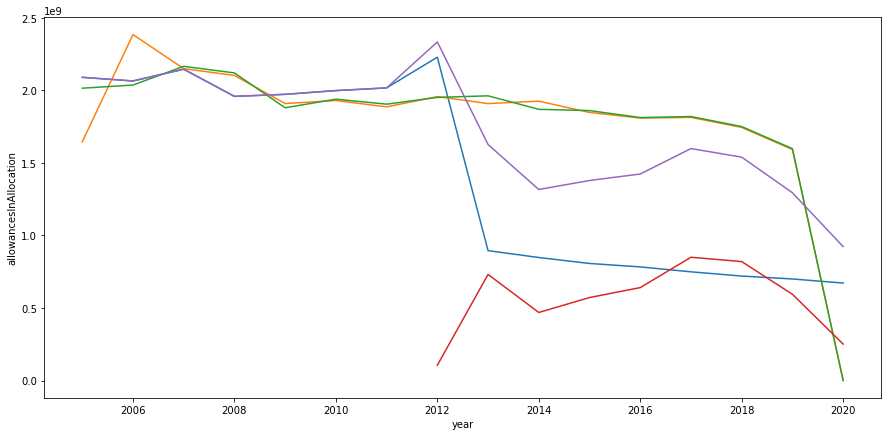

In [140]:
plt.figure(figsize=(15, 7))
sns.lineplot(x=df_compliance_grouped.index, y=df_compliance_grouped["allowancesInAllocation"])
sns.lineplot(x=df_compliance_grouped.index, y=df_compliance_grouped["unitsSurrendered"])
sns.lineplot(x=df_compliance_grouped.index, y=df_compliance_grouped["verifiedEmissionsProcessed"])
sns.lineplot(x=df_auctions_grouped.index, y=df_auctions_grouped["Auction Volume tCO2"])
sns.lineplot(x=df_compliance_grouped.index, y=df_compliance_grouped["Auctions + allocations"])